In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import utils
from tqdm import tqdm
from pathlib import Path
from importlib import reload

Processing source: alice


100%|██████████| 19/19 [00:00<00:00, 29.80it/s]


<Axes: xlabel='order', ylabel='entropy'>

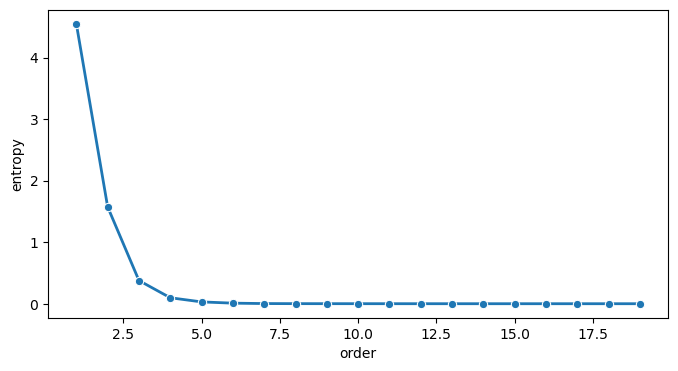

In [2]:
reload(utils)
# quick test
level = "word"  # "char" or "word"
keep_punct = False
white_space = True
orders = list(range(1, 20))

source, path = (
    "alice",
    "data/en/alice.txt",
)
# source, ptah = "en", "data/all_en.txt",

print(f"Processing source: {source}")
raw_text = utils.load_text(path)
tokens = utils.clean_text(
    raw_text, level=level, keep_punctuation=keep_punct, keep_whitespace=white_space
)

rows = []
for order in tqdm(orders):
    counts = utils.build_ngram_counts(tokens, order, show_pb=False, print_stats=False)
    model = utils.normalize_to_probs(counts)
    h_model = utils.calculate_entropy_from_counts(counts)

    rows.append(
        {
            "source": source,
            "order": order,
            "entropy": h_model,
        }
    )
df_res = pd.DataFrame(rows).sort_values(["source", "order"]).reset_index(drop=True)
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=df_res,
    x="order",
    y="entropy",
    marker="o",
    linewidth=2,
)

In [3]:
level = "word"  # "char" or "word"
keep_punct = False
orders = list(range(1, 5))

sources = {
    # "alice": "data/alice.txt",
    "pratt": "data/pratt.txt",
    "english": "data/all_en.txt",
    "german": "data/all_de.txt",
    "french": "data/all_fr.txt",
}

rows = []

for source, corpus_path in sources.items():
    print(f"Processing source: {source}")
    raw_text = utils.load_text(corpus_path)

    for order in tqdm(orders):
        for white_space in [True, False]:
            tokens = utils.clean_text(
                raw_text,
                level=level,
                keep_punctuation=keep_punct,
                keep_whitespace=white_space,
            )
            counts = utils.build_ngram_counts(
                tokens, order, show_pb=False, print_stats=False
            )
            model = utils.normalize_to_probs(counts)
            h_model = utils.calculate_entropy_from_counts(counts)

            rows.append(
                {
                    "source": source,
                    "order": order,
                    "entropy": h_model,
                    "punctuation": keep_punct,
                    "white_space": white_space,
                }
            )

df_ent = pd.DataFrame(rows).sort_values(["source", "order"]).reset_index(drop=True)

Processing source: pratt


100%|██████████| 4/4 [00:00<00:00,  4.74it/s]


Processing source: english


100%|██████████| 4/4 [00:16<00:00,  4.14s/it]


Processing source: german


100%|██████████| 4/4 [00:07<00:00,  1.81s/it]


Processing source: french


100%|██████████| 4/4 [00:14<00:00,  3.70s/it]


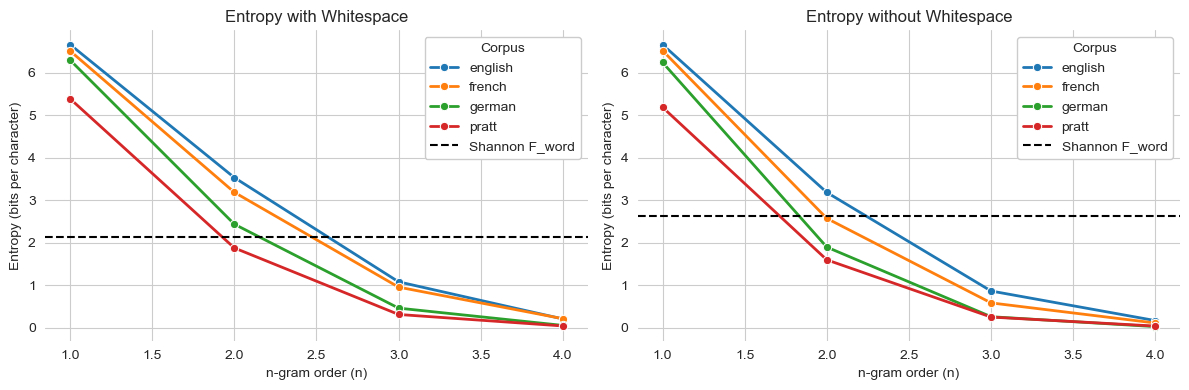

In [14]:
shannon_26 = [4.70, 4.14, 3.56, 3.3, 2.62] # F0, F1, F2, F3, F_word
shannon_27 = [4.76, 4.03, 3.32, 3.1, 2.14]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.set_style("whitegrid")
ax2.sharey(ax1)

sns.lineplot(
    data=df_ent[df_ent["white_space"]],
    x="order",
    y="entropy",
    hue="source",
    marker="o",
    linewidth=2,
    ax=ax1,
)

sns.lineplot(
    data=df_ent[~df_ent["white_space"]],
    x="order",
    y="entropy",
    hue="source",
    marker="o",
    linewidth=2,
    ax=ax2,
)

ax1.axhline(y=2.14, label="Shannon F_word", linestyle="--", color="black") # 27 with whitespace
ax2.axhline(y=2.62, label="Shannon F_word", linestyle="--", color="black")

for ax in (ax1, ax2):
    ax.set_xlabel("n-gram order (n)")
    ax.set_ylabel("Entropy (bits per character)")
    ax.legend(
        title="Corpus",
        framealpha=1,
        loc="upper right",
    )
    sns.despine(left=True, bottom=True, ax=ax)

ax1.set_title("Entropy with Whitespace")
ax2.set_title("Entropy without Whitespace")

plt.tight_layout()
plt.show()

In [5]:
level = "word"  # "char" or "word"
keep_punct = False
orders = list(range(1, 5))

lang_dirs = {
    "english": Path("data/en"),
    "german": Path("data/de"),
    "french": Path("data/fr"),
}

rows = []

for language, d in lang_dirs.items():
    book_paths = sorted(
        [p for p in d.glob("*.txt") if p.is_file() and not p.name.startswith(".")]
    )

    if not book_paths:
        print(f"Warning: no .txt files found in {d}")
        continue

    for book_path in book_paths:
        book = book_path.stem
        print(f"Processing source: {language}, book: {book}")

        raw_text = utils.load_text(str(book_path))

        for order in tqdm(orders):
            for white_space in [True, False]:
                tokens = utils.clean_text(
                    raw_text,
                    level=level,
                    keep_punctuation=keep_punct,
                    keep_whitespace=white_space,
                )
                counts = utils.build_ngram_counts(
                    tokens, order, show_pb=False, print_stats=False
                )
                h_model = utils.calculate_entropy_from_counts(counts)

                rows.append(
                    {
                        "source": language,  # keep language here
                        "book": book,  # per-book identifier
                        "order": order,
                        "entropy": h_model,
                        "white_space": white_space,
                    }
                )

df_ent_bybook = (
    pd.DataFrame(rows).sort_values(["source", "book", "order"]).reset_index(drop=True)
)

Processing source: english, book: alice


100%|██████████| 4/4 [00:00<00:00, 18.08it/s]


Processing source: english, book: brothers_karamazov


100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


Processing source: english, book: crime_n_punishment


100%|██████████| 4/4 [00:01<00:00,  2.66it/s]


Processing source: english, book: gatsby


100%|██████████| 4/4 [00:00<00:00, 10.77it/s]


Processing source: english, book: leviathan


100%|██████████| 4/4 [00:01<00:00,  2.62it/s]


Processing source: english, book: pratt


100%|██████████| 4/4 [00:00<00:00,  6.22it/s]


Processing source: english, book: pride_n_prejudice


100%|██████████| 4/4 [00:00<00:00,  4.37it/s]


Processing source: english, book: romeo_n_juliet


100%|██████████| 4/4 [00:00<00:00, 16.63it/s]


Processing source: english, book: the_prince


100%|██████████| 4/4 [00:00<00:00,  9.96it/s]


Processing source: english, book: two_cities


100%|██████████| 4/4 [00:00<00:00,  4.01it/s]


Processing source: english, book: war_n_peace


100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Processing source: german, book: das_urteil


100%|██████████| 4/4 [00:00<00:00, 51.88it/s]


Processing source: german, book: der_wille_zur_macht


100%|██████████| 4/4 [00:00<00:00,  4.97it/s]


Processing source: german, book: kant_kritik


100%|██████████| 4/4 [00:01<00:00,  3.80it/s]


Processing source: german, book: steppenwolf


100%|██████████| 4/4 [00:00<00:00,  7.40it/s]


Processing source: german, book: struwwelpeter


100%|██████████| 4/4 [00:00<00:00, 82.56it/s]


Processing source: german, book: verwandlung


100%|██████████| 4/4 [00:00<00:00, 23.71it/s]


Processing source: german, book: zauberberg1


100%|██████████| 4/4 [00:01<00:00,  3.13it/s]


Processing source: german, book: zauberberg2


100%|██████████| 4/4 [00:01<00:00,  2.97it/s]


Processing source: french, book: candide


100%|██████████| 4/4 [00:00<00:00, 13.69it/s]


Processing source: french, book: centre_de_la_terre


100%|██████████| 4/4 [00:00<00:00,  7.57it/s]


Processing source: french, book: fantome_opera


100%|██████████| 4/4 [00:00<00:00,  4.83it/s]


Processing source: french, book: ile_myst


100%|██████████| 4/4 [00:01<00:00,  2.69it/s]


Processing source: french, book: mme_bovary


100%|██████████| 4/4 [00:00<00:00,  4.22it/s]


Processing source: french, book: monte_cristo


100%|██████████| 4/4 [00:00<00:00,  4.21it/s]


Processing source: french, book: notre_dame


100%|██████████| 4/4 [00:01<00:00,  2.83it/s]


Processing source: french, book: rouge_et_noir


100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


Processing source: french, book: terre_lune


100%|██████████| 4/4 [00:00<00:00,  8.74it/s]


Processing source: french, book: tour_du_monde


100%|██████████| 4/4 [00:00<00:00,  6.73it/s]


Processing source: french, book: trois_mousquetaires


100%|██████████| 4/4 [00:01<00:00,  2.32it/s]


Processing source: french, book: ving_mille_lieues


100%|██████████| 4/4 [00:01<00:00,  3.45it/s]


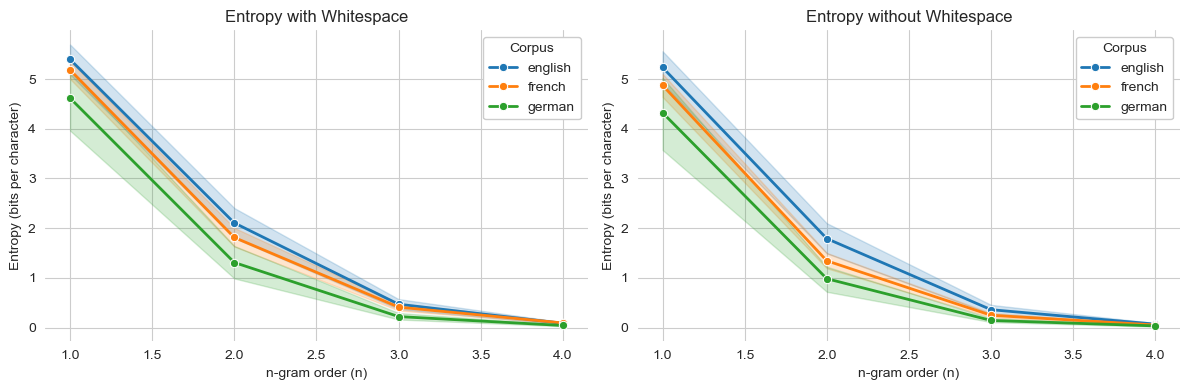

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.set_style("whitegrid")
ax2.sharey(ax1)

sns.lineplot(
    data=df_ent_bybook[df_ent_bybook["white_space"]],
    x="order",
    y="entropy",
    hue="source",
    marker="o",
    linewidth=2,
    ax=ax1,
)

sns.lineplot(
    data=df_ent_bybook[~df_ent_bybook["white_space"]],
    x="order",
    y="entropy",
    hue="source",
    marker="o",
    linewidth=2,
    ax=ax2,
)

for ax in (ax1, ax2):
    ax.set_xlabel("n-gram order (n)")
    ax.set_ylabel("Entropy (bits per character)")
    ax.legend(
        title="Corpus",
        framealpha=1,
        loc="upper right",
    )
    sns.despine(left=True, bottom=True, ax=ax)

ax1.set_title("Entropy with Whitespace")
ax2.set_title("Entropy without Whitespace")

plt.tight_layout()
plt.show()

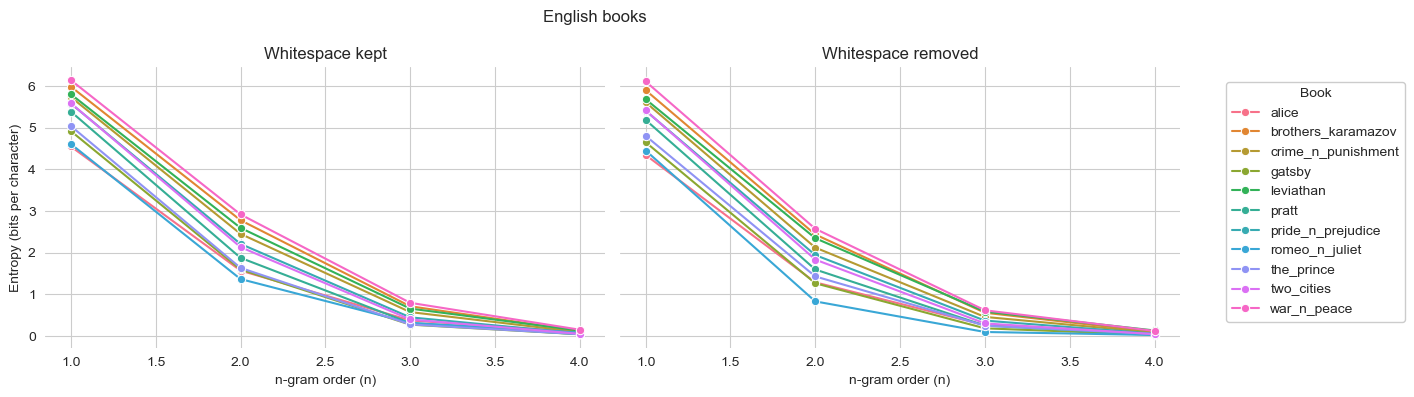

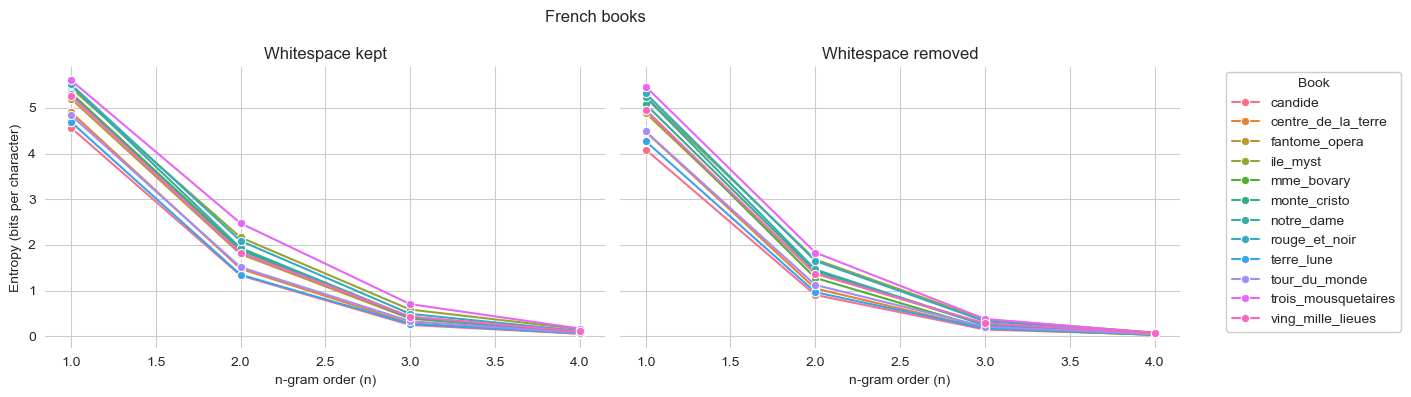

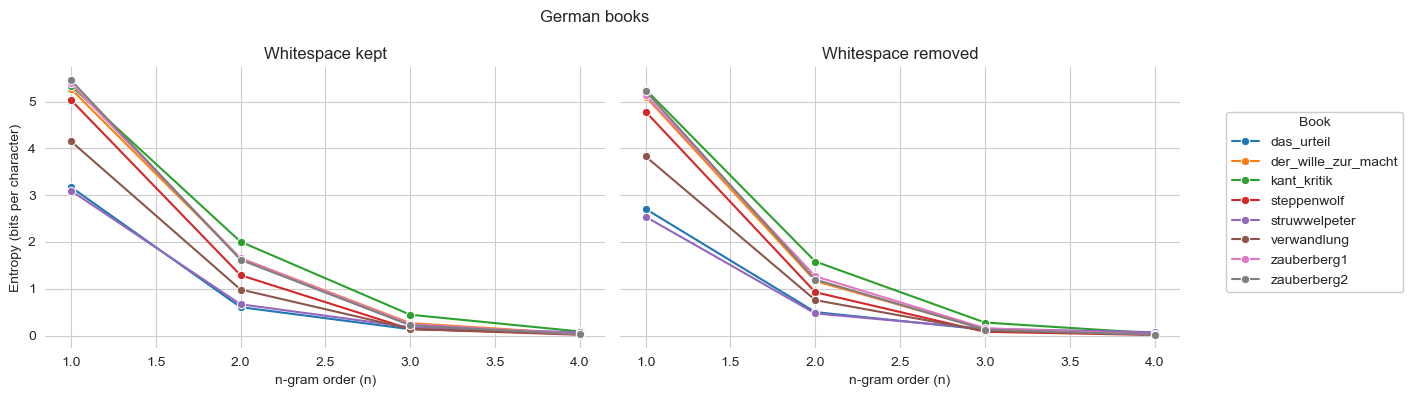

In [7]:
sns.set_style("whitegrid")

languages = ["english", "french", "german"]
titles = ["English books", "French books", "German books"]
col_titles = ["Whitespace kept", "Whitespace removed"]

for lang, title in zip(languages, titles):
    df_lang = df_ent_bybook[df_ent_bybook["source"] == lang]

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=True)
    # palette = sns.color_palette("coolwarm", n_colors=df_lang["book"].nunique())

    for ax, ws, col_title in zip(axes, [True, False], col_titles):
        df_sub = df_lang[df_lang["white_space"] == ws]

        sns.lineplot(
            data=df_sub,
            x="order",
            y="entropy",
            hue="book",
            marker="o",
            linewidth=1.5,
            ax=ax,
            # palette=palette,
        )

        ax.set_title(col_title)
        ax.set_xlabel("n-gram order (n)")
        ax.set_ylabel("Entropy (bits per character)")

    # single legend for the whole language, outside on the right
    handles, labels = axes[1].get_legend_handles_labels()
    axes[0].get_legend().remove()
    axes[1].get_legend().remove()

    fig.legend(
        handles,
        labels,
        title="Book",
        framealpha=1,
        bbox_to_anchor=(1.02, 0.5),
        loc="center left",
    )

    fig.suptitle(title)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()